In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score

In [ ]:
df = pd.read_csv('/content/HEALTH PREDECTION.csv')
df.head(2)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No


In [ ]:
df.shape

(101, 11)

In [ ]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [ ]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

0

In [ ]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [ ]:
df.columns = ['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [ ]:
df.head(1)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [ ]:
df['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [ ]:
df['Year'] = df['Year'].apply(lambda x : int(x.split(' ')[-1]))
df['Year'].unique()

array([1, 2, 3, 4])

In [ ]:
df.head(3)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [ ]:
df['CGPA'].unique() #removing the trailing space

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [ ]:
df['CGPA'] = df['CGPA'].apply(lambda x : x.strip())
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [ ]:
#checking the number of courses available
Course_List = df['Course'].unique().tolist()
print(len(Course_List))

df['Course'].unique()

49


array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [ ]:
course_dic = {'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' ,
              'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe',
              'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'}

df['Course'].replace(course_dic,inplace=True)

In [ ]:
len(df['Course'].unique().tolist())

37

In [ ]:
df.sample(5)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
51,8/7/2020 15:37,Female,18.0,BCS,2,3.50 - 4.00,No,No,Yes,No,No
30,8/7/2020 14:27,Female,23.0,Business Administration,2,3.00 - 3.49,No,No,No,No,No
24,8/7/2020 13:17,Female,23.0,BCS,3,3.50 - 4.00,No,Yes,Yes,Yes,No
64,8/7/2020 17:46,Female,24.0,Engineering,1,3.50 - 4.00,No,No,No,No,No
13,8/7/2020 12:41,Male,19.0,Engineering,1,3.00 - 3.49,No,No,No,No,No


In [ ]:
df['Course'].value_counts()

Engineering                20
BCS                        18
IT                         11
Biomedical science          4
KOE                         4
Law                         3
BENL                        3
Irkhs                       3
Psychology                  3
Pendidikan Islam            2
Fiqh                        2
Koe                         2
Islamic Education           2
Human Sciences              1
Malcom                      1
Kop                         1
Diploma Nursing             1
Biotechnology               1
Communication               1
Econs                       1
Pendidikan Islam            1
Radiography                 1
DIPLOMA TESL                1
MHSC                        1
TAASL                       1
CTS                         1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine science              1
ENM                         1
Accounting                  1
KENMS     

In [ ]:
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

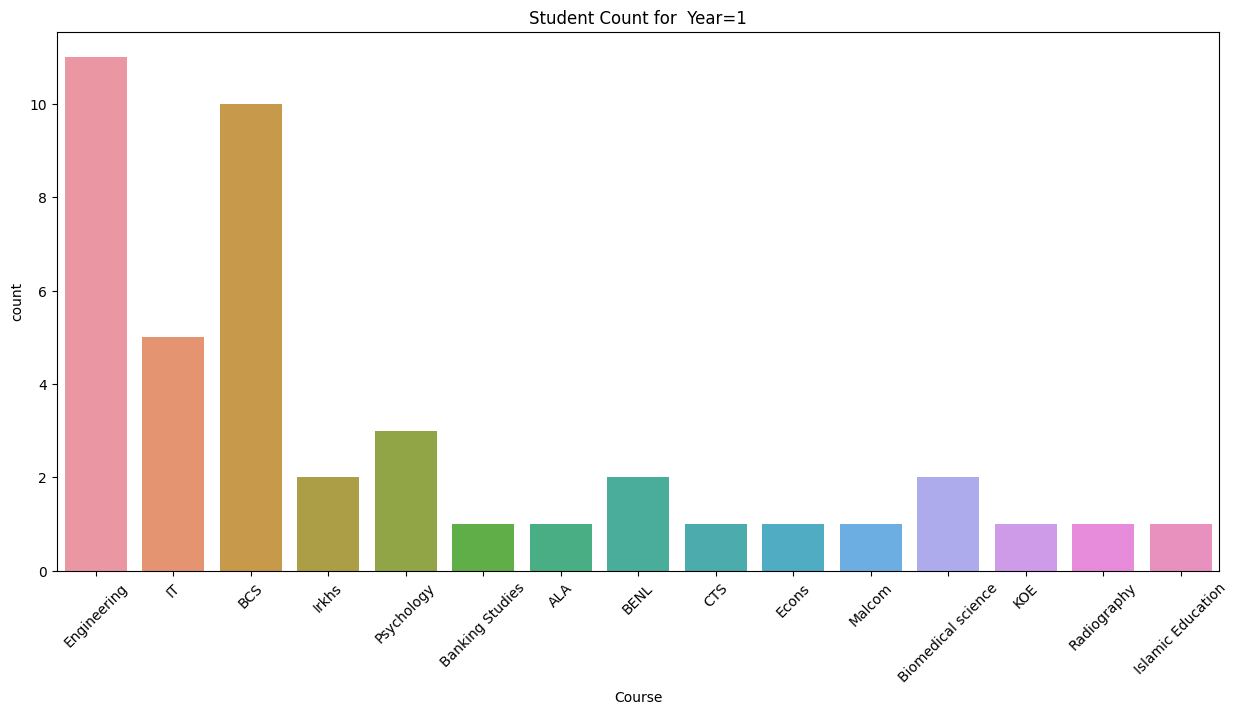

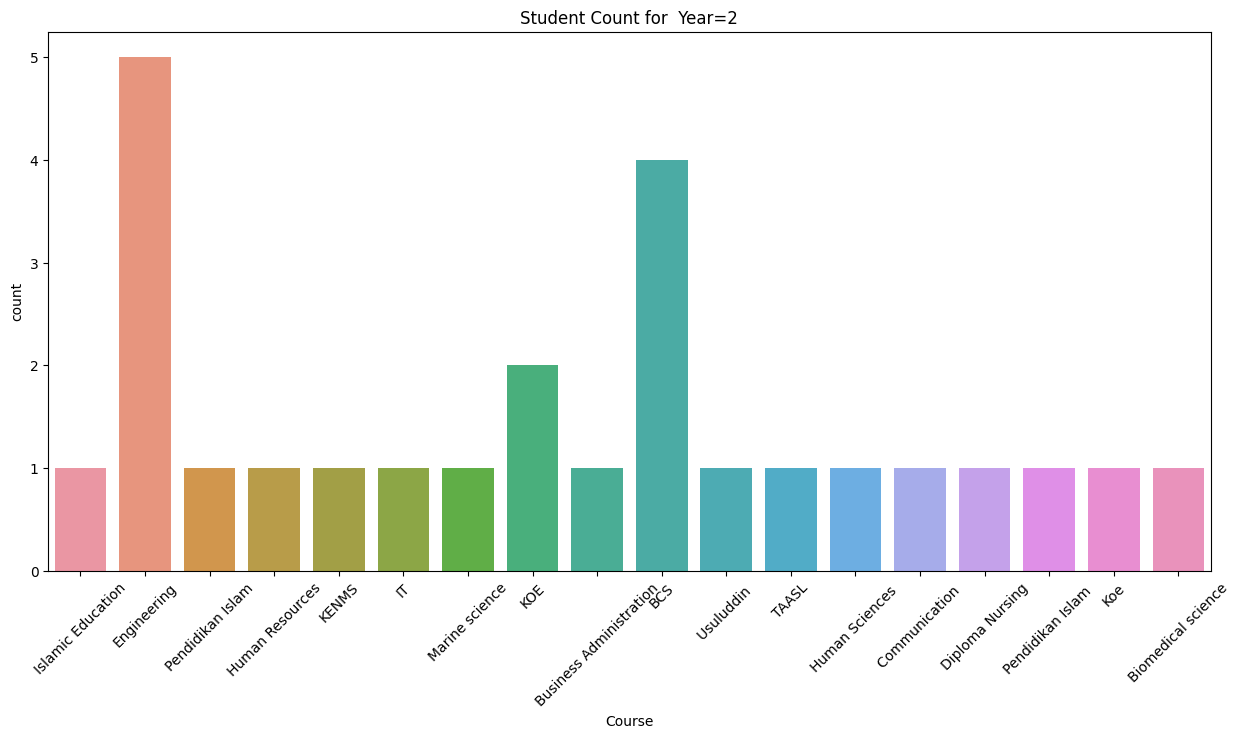

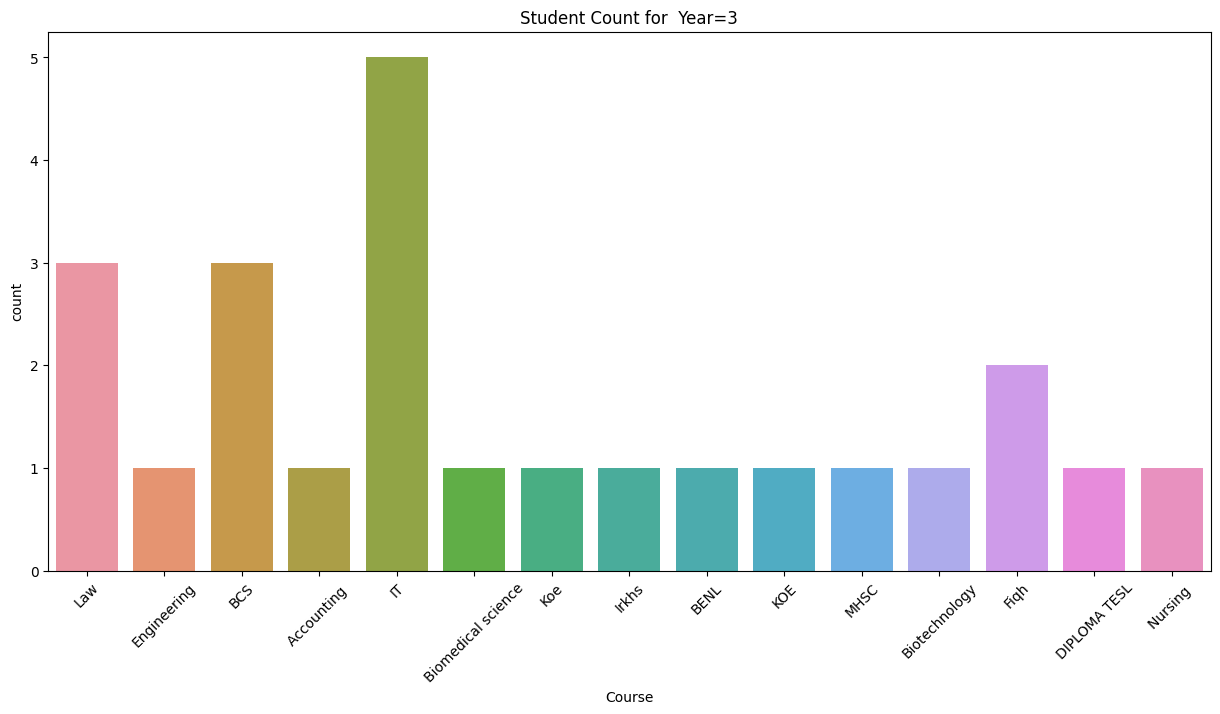

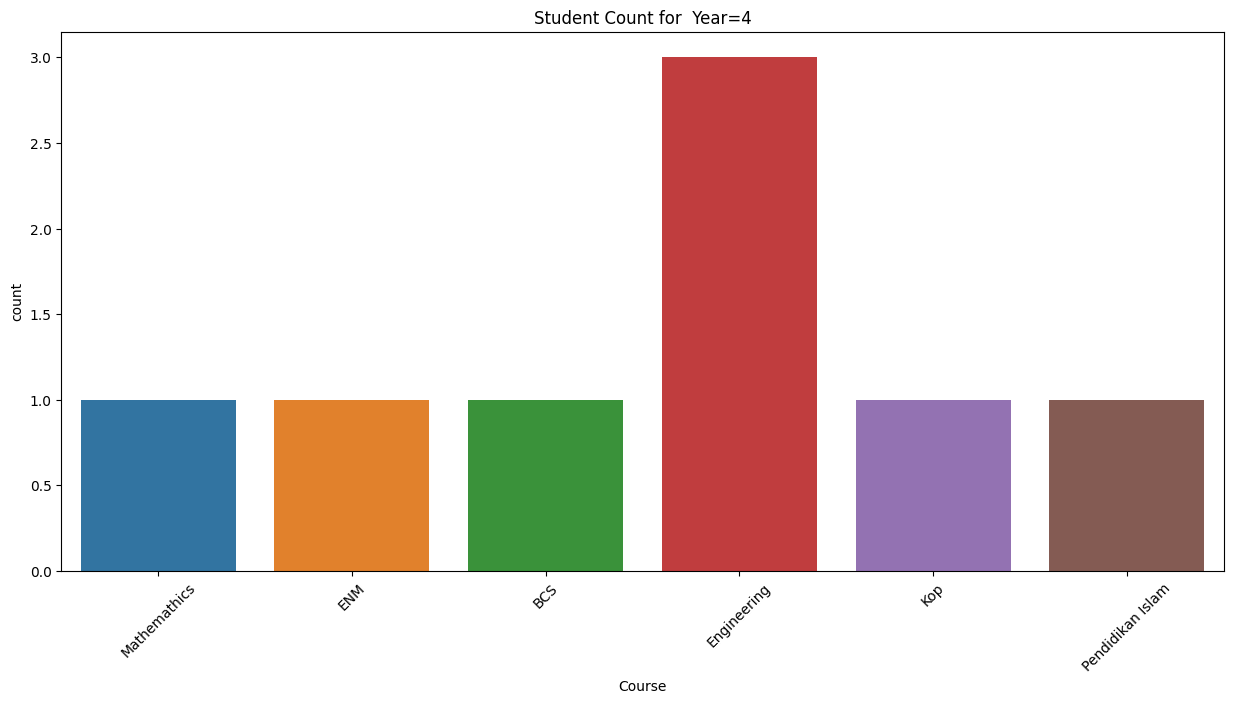

In [ ]:
def plot_student_cnt(dataframe):
    for yr in dataframe['Year'].unique().tolist():
        plt.figure(figsize=(15, 7))
        pl_1 = sns.countplot(x='Course',data=dataframe[dataframe['Year']==yr])
        pl_1.set_xticklabels(pl_1.get_xticklabels(), rotation=45)
        pl_1.set_title(f'Student Count for  Year={yr}')

plot_student_cnt(df)

ANXIETY


In [ ]:
df['Anxiety'].value_counts()

No     67
Yes    34
Name: Anxiety, dtype: int64

Text(0.5, 1.0, 'Course vs Anxiety')

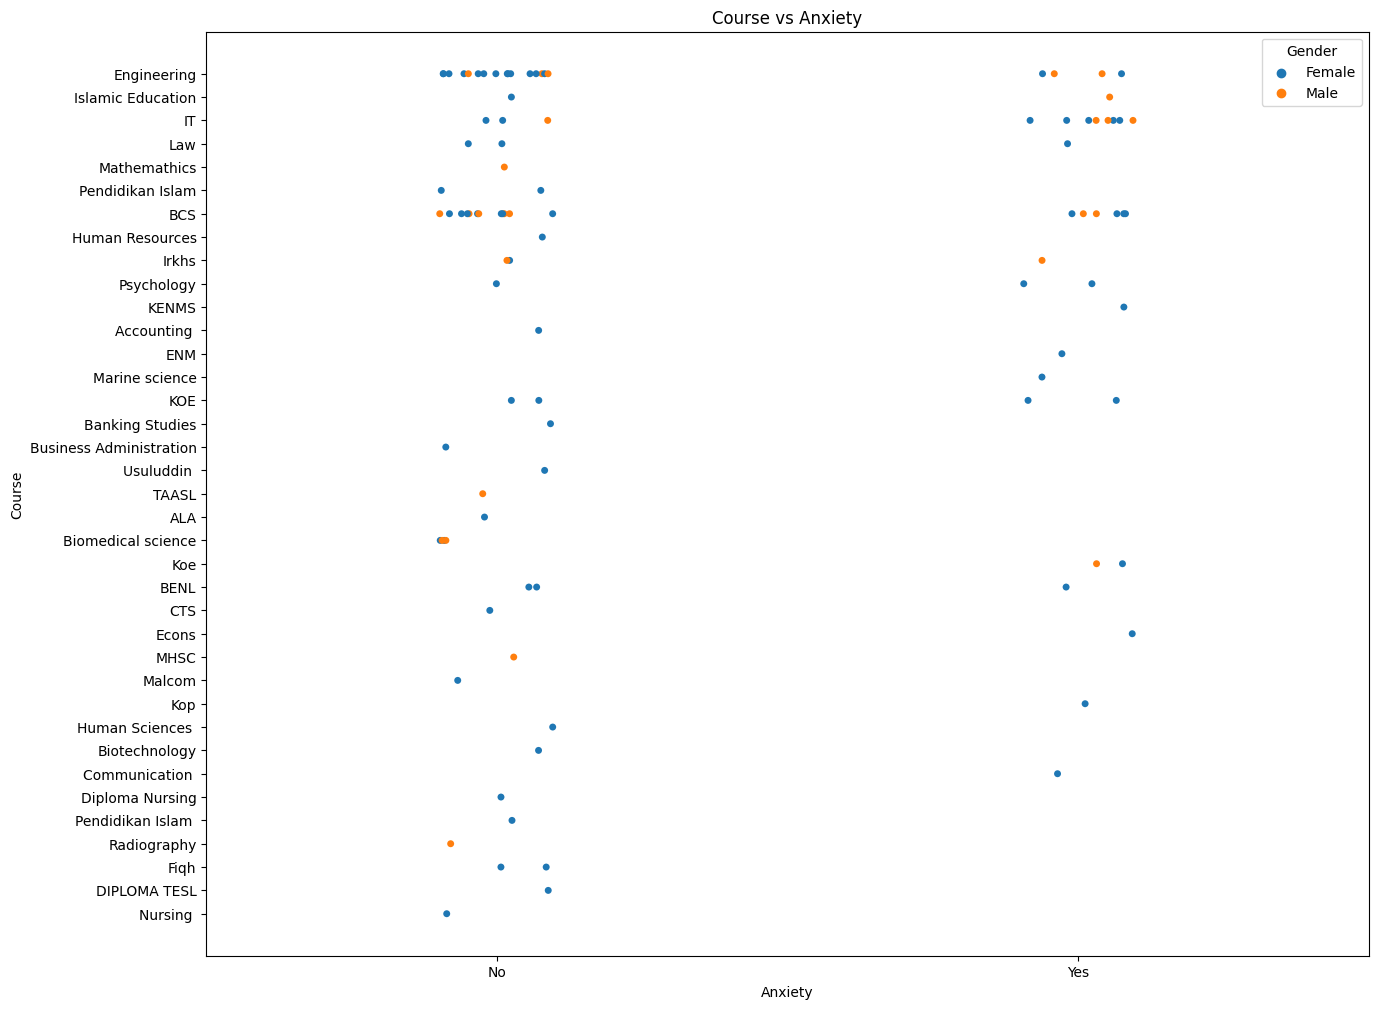

In [ ]:
plt.figure(figsize=(15,12))
plot_1 = sns.stripplot(x='Anxiety',y='Course',data=df,hue='Gender')
plot_1.set_title("Course vs Anxiety")

In [ ]:
print(" No Anxiety \n")
print(df[df['Anxiety']=='No']['Course'].value_counts().nlargest(5))
print("\n Anxiety \n")
print(df[df['Anxiety']=='Yes']['Course'].value_counts().nlargest(5))

 No Anxiety 

Engineering           16
BCS                   12
Biomedical science     4
IT                     3
BENL                   2
Name: Course, dtype: int64

 Anxiety 

IT             8
BCS            6
Engineering    4
Koe            2
KOE            2
Name: Course, dtype: int64


In [ ]:
df[['Anxiety','Gender']].groupby('Gender')['Anxiety'].value_counts()

Gender  Anxiety
Female  No         51
        Yes        24
Male    No         16
        Yes        10
Name: Anxiety, dtype: int64

In [ ]:
Anx = df[df['Anxiety']=='Yes']['Course'].unique().tolist()
No_Anx = df[df['Anxiety']=='No']['Course'].unique().tolist()


set1 = set(No_Anx)
set2 = set(Anx)

print(list(sorted(set1 - set2)))

['ALA', 'Accounting ', 'Banking Studies', 'Biomedical science', 'Biotechnology', 'Business Administration', 'CTS', 'DIPLOMA TESL', 'Diploma Nursing', 'Fiqh', 'Human Resources', 'Human Sciences ', 'MHSC', 'Malcom', 'Mathemathics', 'Nursing ', 'Pendidikan Islam', 'Pendidikan Islam ', 'Radiography', 'TAASL', 'Usuluddin ']


DEPRESSION

In [ ]:
df['Depression'].value_counts()

No     66
Yes    35
Name: Depression, dtype: int64

Text(0.5, 1.0, 'Course vs Depression')

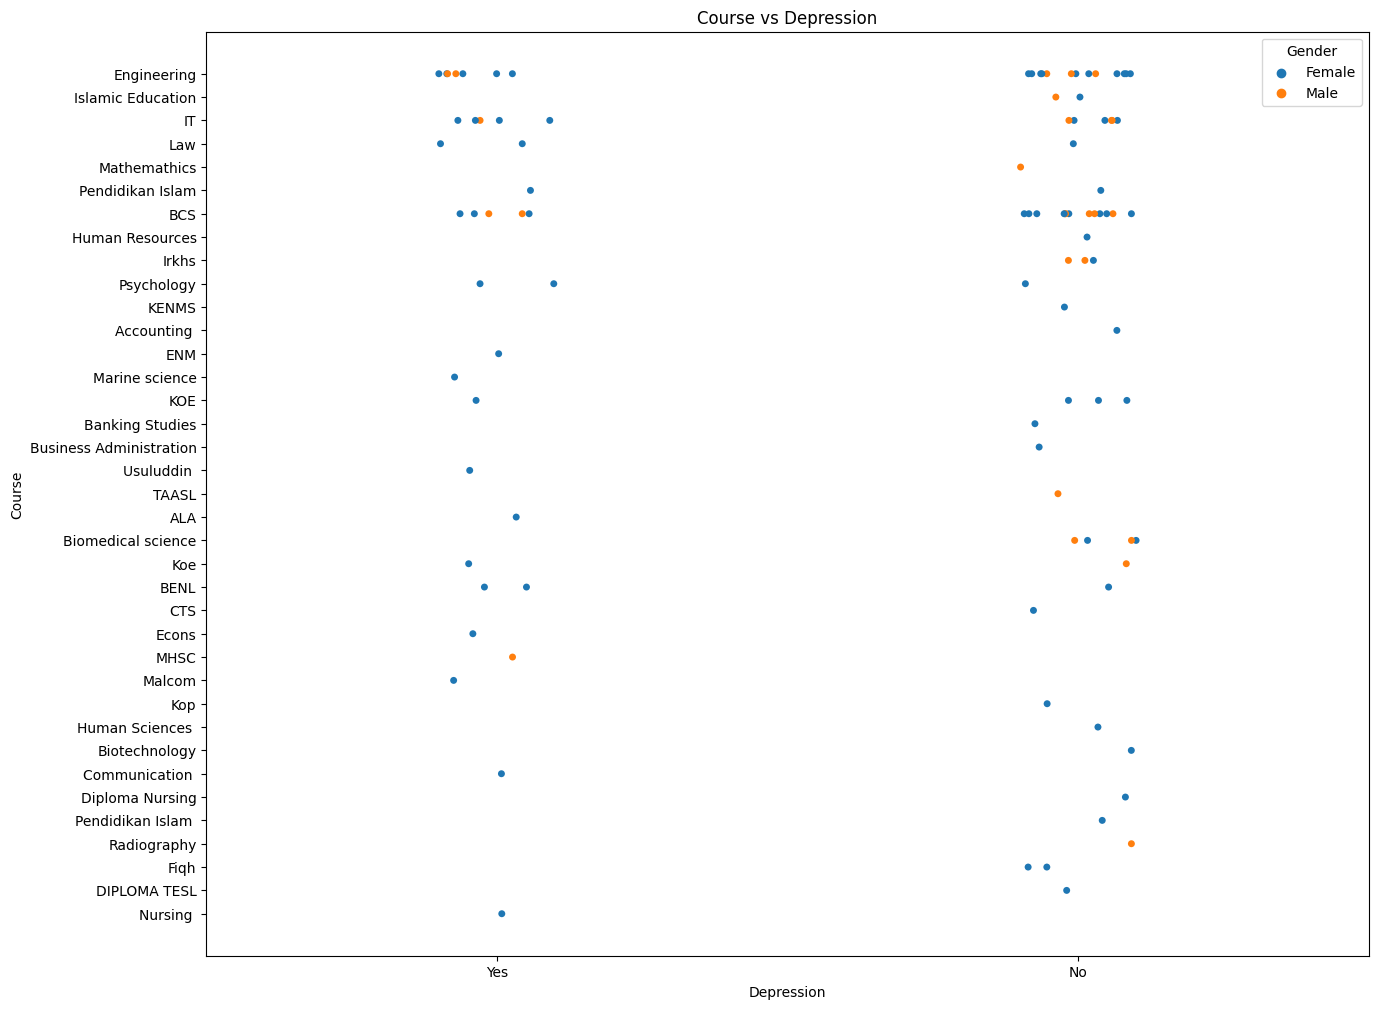

In [ ]:
plt.figure(figsize=(15,12))
plot_2 = sns.stripplot(x='Depression',y='Course',data=df,hue='Gender')
plot_2.set_title("Course vs Depression")

In [ ]:
print(df[df['Depression']=='Yes']['Course'].value_counts().nlargest(5))

Engineering    7
BCS            5
IT             5
Law            2
Psychology     2
Name: Course, dtype: int64


In [ ]:
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [ ]:
df[['Gender','Depression']].value_counts()

Gender  Depression
Female  No            46
        Yes           29
Male    No            20
        Yes            6
dtype: int64

PANIC ATTACKS

Text(0.5, 1.0, 'Course vs Panic_Attack')

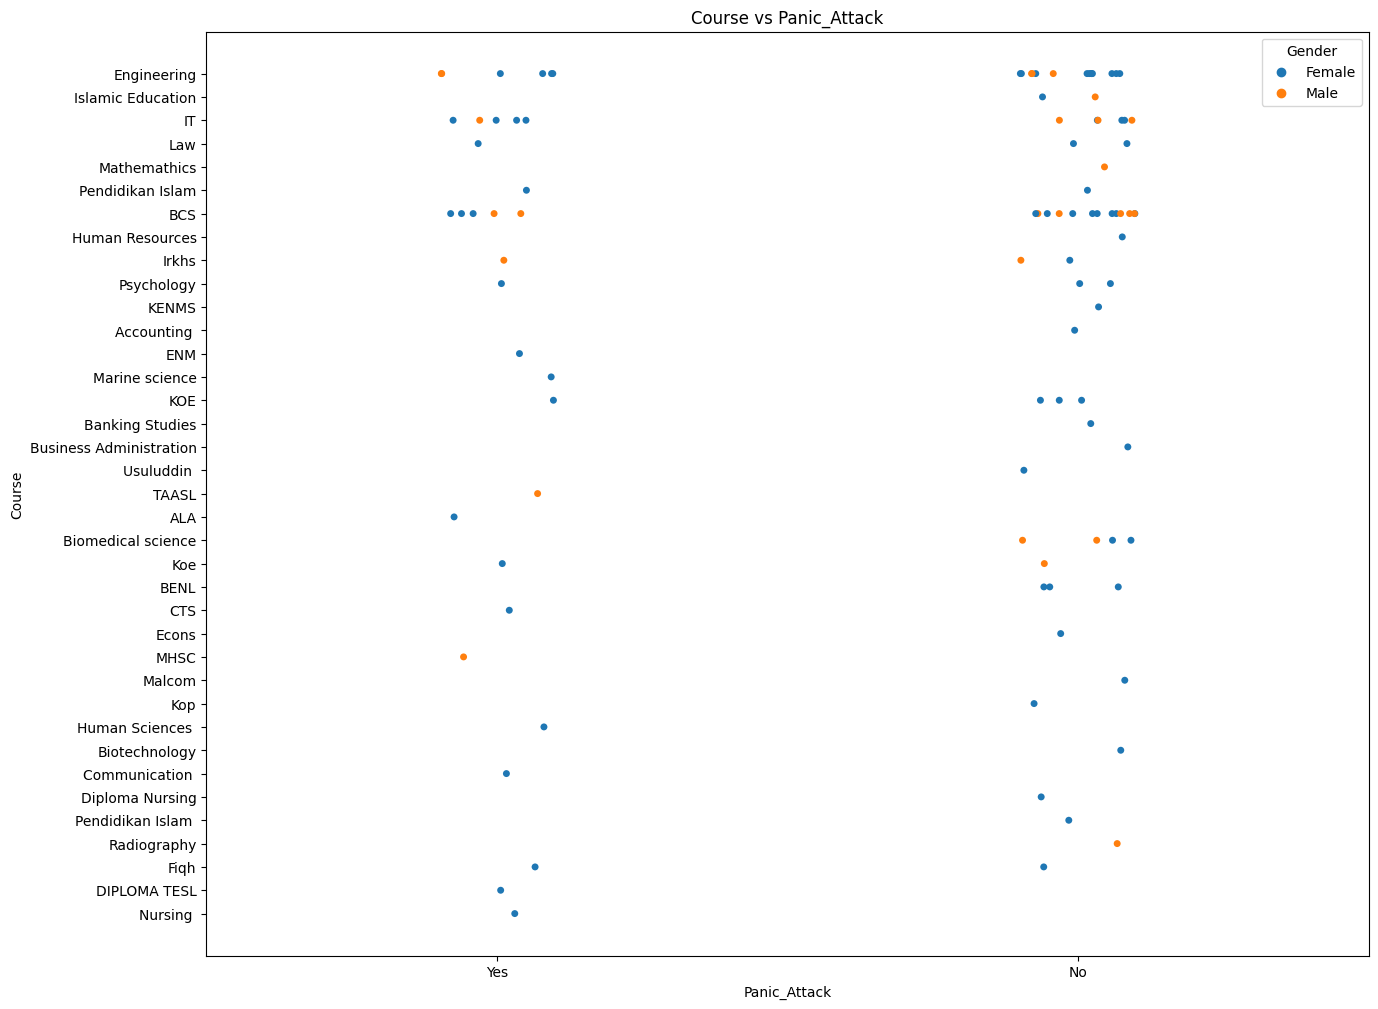

In [ ]:
plt.figure(figsize=(15,12))
plot_2 = sns.stripplot(x='Panic_Attack',y='Course',data=df,hue='Gender')
plot_2.set_title("Course vs Panic_Attack")

In [ ]:
df[df['Panic_Attack']=='Yes']['Course'].value_counts().nlargest(5)

Engineering    6
BCS            5
IT             5
MHSC           1
Fiqh           1
Name: Course, dtype: int64

In [ ]:
df[['Gender','Panic_Attack']].value_counts()

Gender  Panic_Attack
Female  No              50
        Yes             25
Male    No              18
        Yes              8
dtype: int64

In [ ]:
def problem(dataframe):
    list = ['Depression','Anxiety','Panic_Attack']
    for i in list:
        print(df[['Year',i]].groupby('Year')[i].value_counts())
        print('\n')

problem(df)

Year  Depression
1     No            29
      Yes           14
2     No            16
      Yes           10
3     No            14
      Yes           10
4     No             7
      Yes            1
Name: Depression, dtype: int64


Year  Anxiety
1     No         29
      Yes        14
2     No         16
      Yes        10
3     No         16
      Yes         8
4     No          6
      Yes         2
Name: Anxiety, dtype: int64


Year  Panic_Attack
1     No              29
      Yes             14
2     No              18
      Yes              8
3     No              14
      Yes             10
4     No               7
      Yes              1
Name: Panic_Attack, dtype: int64




<Axes: xlabel='Age', ylabel='count'>

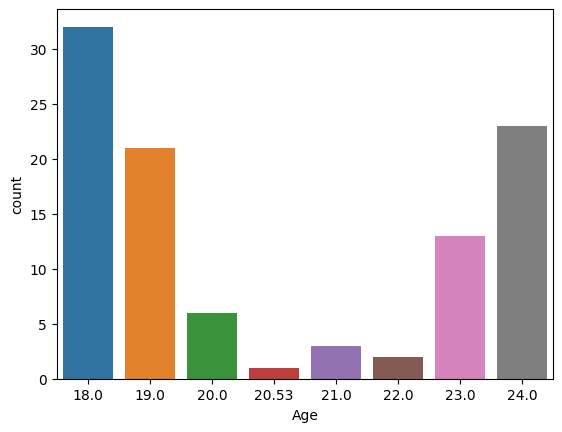

In [ ]:
sns.countplot(x='Age',data=df)

In [ ]:
df["Age"].value_counts()

18.00    32
24.00    23
19.00    21
23.00    13
20.00     6
21.00     3
22.00     2
20.53     1
Name: Age, dtype: int64

In [ ]:
row_idx = df[df['Age']==20.53].index

In [ ]:
df.iloc[row_idx]

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
43,8/7/2020 15:07,Male,20.53,IT,1,0 - 1.99,No,No,No,No,No


(100, 11)


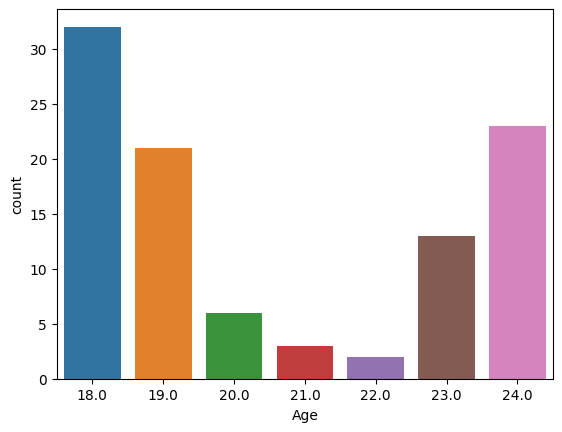

In [ ]:
df_1 = df.drop(row_idx)

sns.countplot(x='Age',data=df_1)

print(df_1.shape)

In [ ]:
df.iloc[row_idx]

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
43,8/7/2020 15:07,Male,20.53,IT,1,0 - 1.99,No,No,No,No,No


In [ ]:
from scipy.stats import shapiro
print(df[['Age','Year']].skew())

print("For age :", shapiro(df[['Age']]))

print("For Year :", shapiro(df[['Year']]))

Age     0.378999
Year    0.558130
dtype: float64
For age : ShapiroResult(statistic=0.790394127368927, pvalue=1.1008247785548875e-10)
For Year : ShapiroResult(statistic=0.8191124796867371, pvalue=8.747355062510564e-10)


<Axes: xlabel='Age', ylabel='Density'>

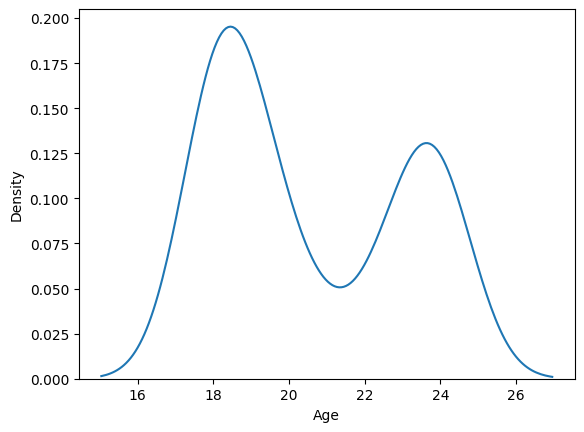

In [ ]:
sns.kdeplot(df['Age'])

<Axes: xlabel='Year', ylabel='Density'>

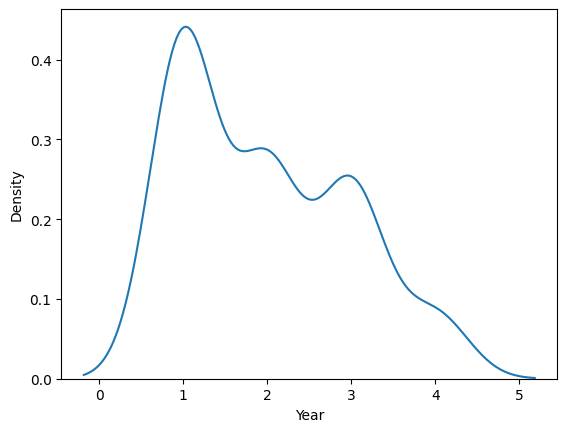

In [ ]:
sns.kdeplot(df['Year'])

In [ ]:
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

Text(0.5, 1.0, 'Count of CGPA by Depression')

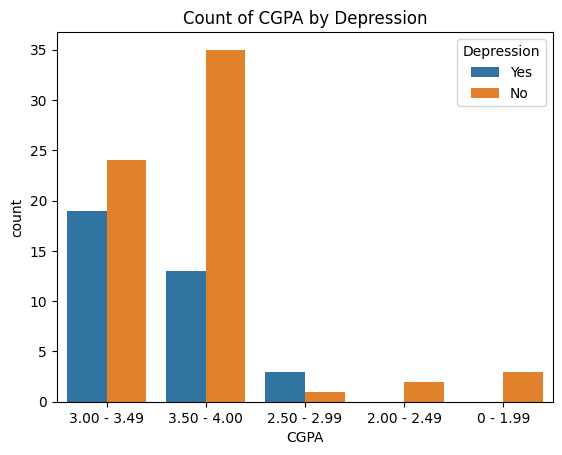

In [ ]:
plot_2 = sns.countplot(x='CGPA',data=df_1,hue='Depression')
plot_2.set_title('Count of CGPA by Depression')

<Axes: xlabel='CGPA', ylabel='count'>

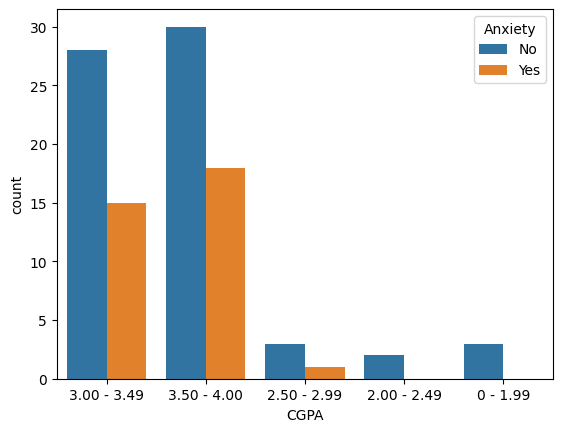

In [ ]:
sns.countplot(x='CGPA',data=df_1,hue='Anxiety')

<Axes: xlabel='CGPA', ylabel='count'>

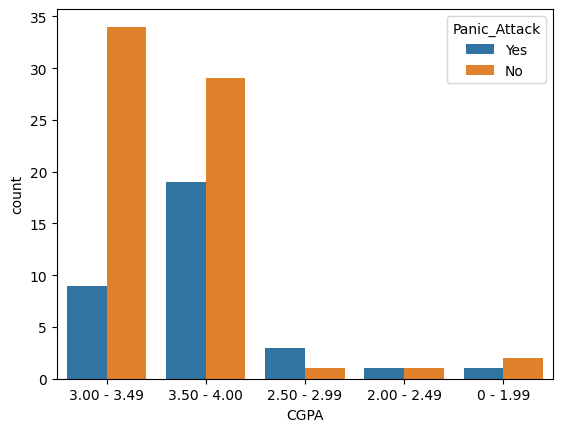

In [ ]:
sns.countplot(x='CGPA',data=df_1,hue='Panic_Attack')

<Axes: xlabel='Year', ylabel='count'>

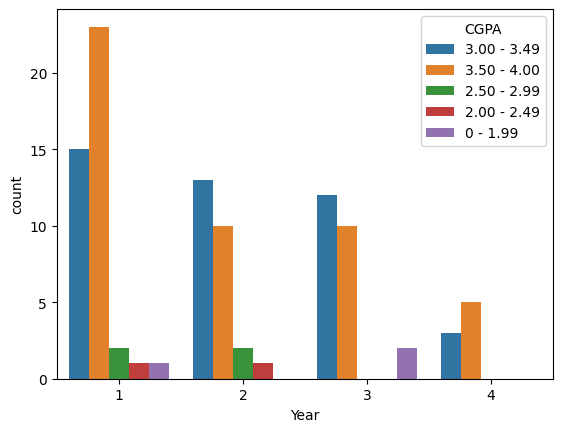

In [ ]:
sns.countplot(x='Year',data=df_1,hue='CGPA')

<Axes: xlabel='Year', ylabel='count'>

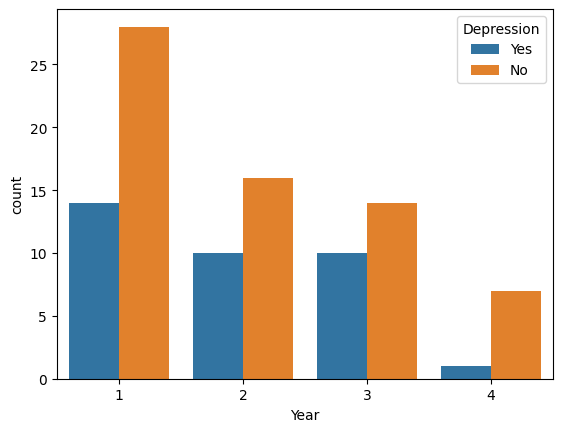

In [ ]:
sns.countplot(x='Year',data=df_1,hue='Depression')

<Axes: xlabel='Year', ylabel='count'>

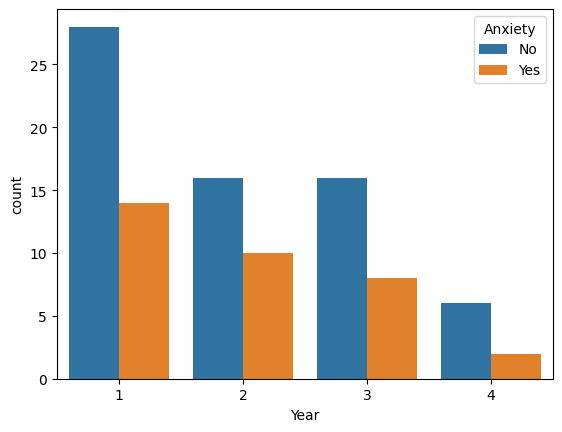

In [ ]:
sns.countplot(x='Year',data=df_1,hue='Anxiety')

<Axes: xlabel='Year', ylabel='count'>

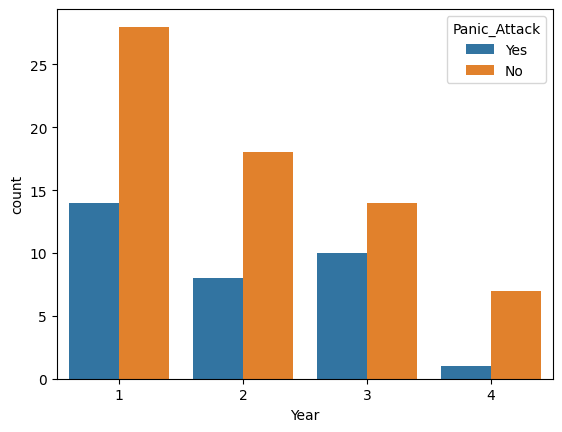

In [ ]:
sns.countplot(x='Year',data=df_1,hue='Panic_Attack')

In [ ]:
df_2 = df_1.drop('Date_Time',axis=1)

In [ ]:
from sklearn import preprocessing

enc = preprocessing.LabelEncoder()

cat_features = df_2.select_dtypes(include=['object']).columns.tolist()

for feature in cat_features:
    df_2[feature] = enc.fit_transform(df_2[feature])

In [ ]:
df_2.dtypes

Gender              int64
Age               float64
Course              int64
Year                int64
CGPA                int64
Marital_Status      int64
Depression          int64
Anxiety             int64
Panic_Attack        int64
Treatment           int64
dtype: object

In [ ]:
df_2

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,2,1,4,0,0,1,0,0
97,1,18.0,14,2,3,0,1,1,0,0
98,0,19.0,30,3,4,1,1,0,1,0
99,0,23.0,31,4,4,0,0,0,0,0


<Axes: >

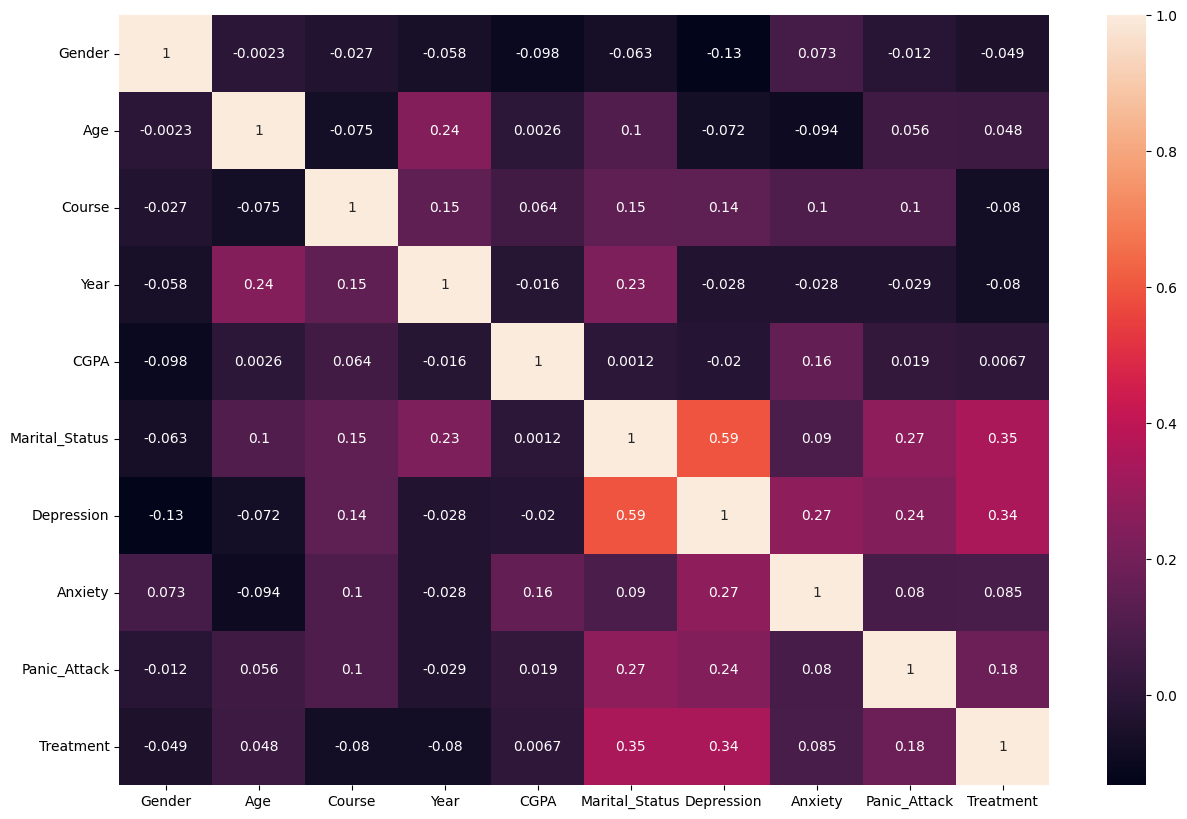

In [ ]:
plt.figure(figsize=(15,10))
cor_mat = df_2.corr(method='pearson')
sns.heatmap(cor_mat,annot=True)

In [ ]:
pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=cfba23f5acc366fb178f3337cface2cc1fe4fa839ea4a1abe5e4788bbe17a538
  Stored in directory: /root/.cache/pip/wheels/d8/2d/fc/c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod

Text(220.58159722222223, 0.5, 'Target')

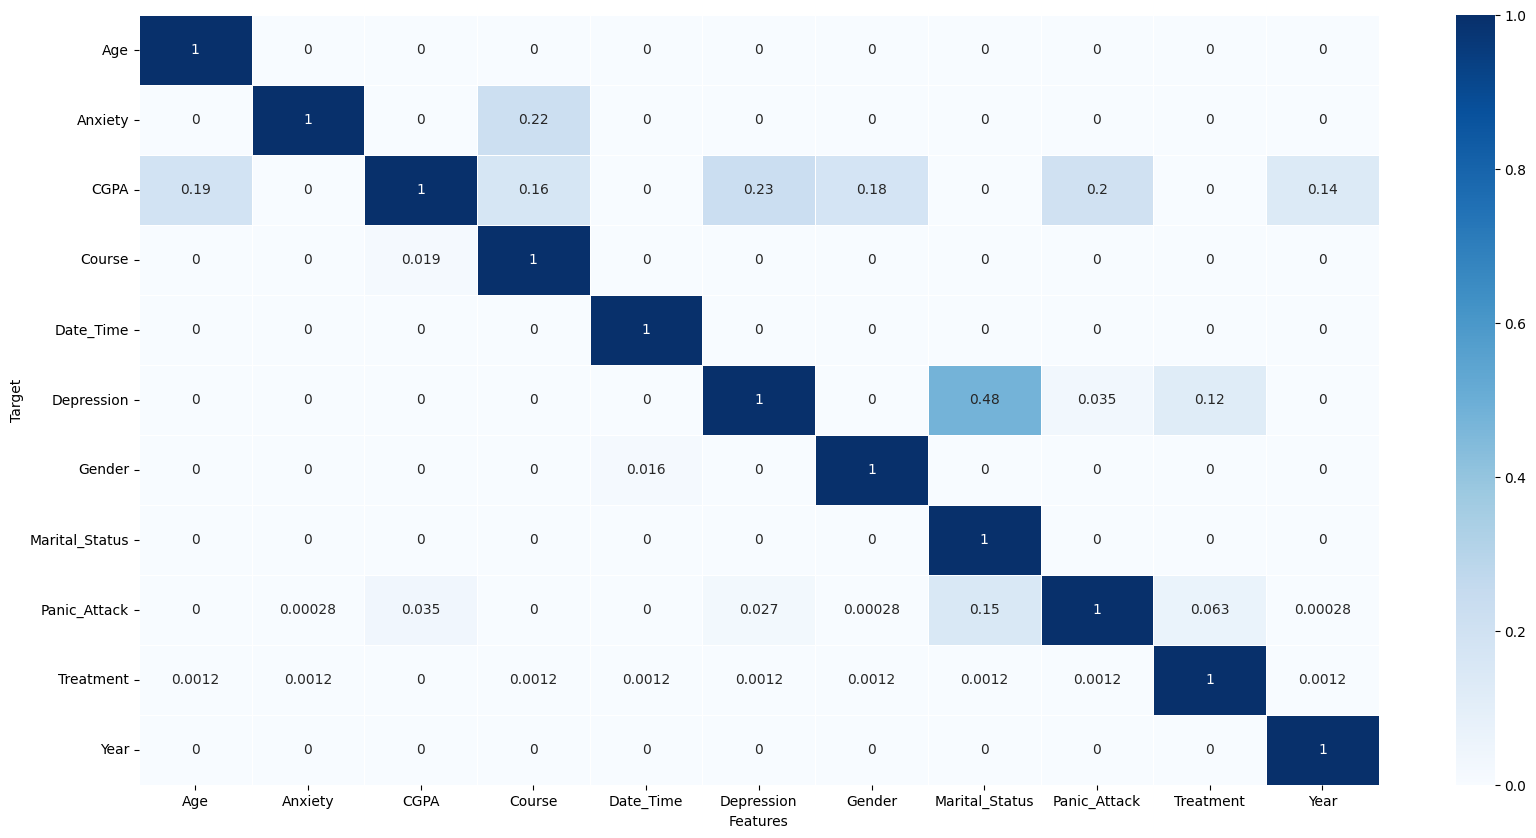

In [ ]:
import ppscore as pps


matrix_df = pps.matrix(df_1)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xlabel('Features')
plt.ylabel('Target')

In [ ]:
def func(dataframe):
    dep = ['Anxiety','Depression','Panic_Attack']
    for d in dep:
        print(f'\n---------{d}--------')
        print(dataframe[['Marital_Status',d]].groupby(d)['Marital_Status'].value_counts())
        print('\n')

func(df_1)


---------Anxiety--------
Anxiety  Marital_Status
No       No                57
         Yes                9
Yes      No                27
         Yes                7
Name: Marital_Status, dtype: int64



---------Depression--------
Depression  Marital_Status
No          No                65
Yes         No                19
            Yes               16
Name: Marital_Status, dtype: int64



---------Panic_Attack--------
Panic_Attack  Marital_Status
No            No                61
              Yes                6
Yes           No                23
              Yes               10
Name: Marital_Status, dtype: int64




In [ ]:
df_1

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No


In [ ]:
df_final = df_1.drop('Date_Time',axis=1)
df_final.head(1)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No


In [ ]:
df_final[df_final['Age']==20.53].index

Int64Index([], dtype='int64')

TRAINING MODEL

In [ ]:
df_2.sample(2)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
99,0,23.0,31,4,4,0,0,0,0,0
28,0,24.0,18,3,4,1,1,1,1,1


In [ ]:
df_2_f = df_2.drop('CGPA',axis=1) # Since CGPA have least or no effect on Treatment seen from PPS and Pearson matrix
df_2_f.columns

Index(['Gender', 'Age', 'Course', 'Year', 'Marital_Status', 'Depression',
       'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [ ]:
x = df_2_f.drop('Treatment',axis=1)
y = df_2_f['Treatment']

In [ ]:
df_2_f.to_excel('Encoded_excel.xlsx')

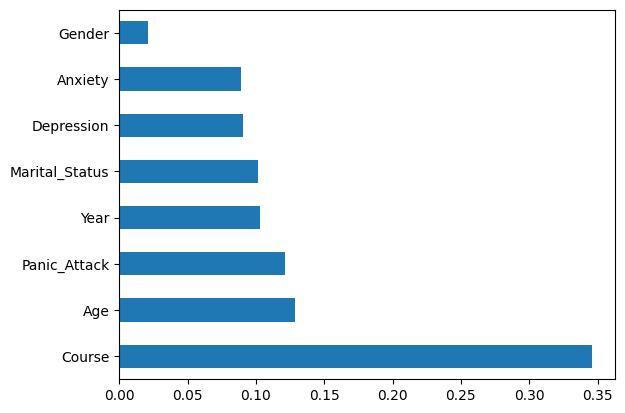

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
os=RandomOverSampler(random_state=42)
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({0: 75, 1: 5})
The number of classes after fit Counter({0: 75, 1: 75})


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_ovr = AdaBoostClassifier(n_estimators=300,learning_rate=0.25)
ada_ovr.fit(X_train_os,Y_train_os)

y_pred_ovr = ada_ovr.predict(X_test)
print(classification_report(Y_test,y_pred_ovr))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.50      1.00      0.67         1

    accuracy                           0.95        20
   macro avg       0.75      0.97      0.82        20
weighted avg       0.97      0.95      0.96        20



In [ ]:
df_final['Treatment'].value_counts()

No     94
Yes     6
Name: Treatment, dtype: int64

In [ ]:
x_data = df_final.drop('Treatment',axis=1)
y_data = df_final[['Treatment']]

In [ ]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state = 20)

In [ ]:
categorical_columns = x_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'Course',
 'CGPA',
 'Marital_Status',
 'Depression',
 'Anxiety',
 'Panic_Attack']

In [ ]:
y_data.value_counts()

Treatment
No           94
Yes           6
dtype: int64

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat_1 = CatBoostClassifier(class_weights={'No':0.2,'Yes':0.8})
cat_1.fit(x_train,y_train,cat_features=categorical_columns)

Learning rate set to 0.003504
0:	learn: 0.6898980	total: 49.5ms	remaining: 49.4s
1:	learn: 0.6876852	total: 50.7ms	remaining: 25.3s
2:	learn: 0.6841505	total: 52.4ms	remaining: 17.4s
3:	learn: 0.6818839	total: 53.3ms	remaining: 13.3s
4:	learn: 0.6773608	total: 54.5ms	remaining: 10.8s
5:	learn: 0.6734310	total: 55.4ms	remaining: 9.18s
6:	learn: 0.6695741	total: 57ms	remaining: 8.08s
7:	learn: 0.6662317	total: 58.4ms	remaining: 7.25s
8:	learn: 0.6625625	total: 59.7ms	remaining: 6.58s
9:	learn: 0.6589396	total: 61.3ms	remaining: 6.07s
10:	learn: 0.6552923	total: 62.3ms	remaining: 5.6s
11:	learn: 0.6512614	total: 63.7ms	remaining: 5.24s
12:	learn: 0.6477291	total: 65.1ms	remaining: 4.94s
13:	learn: 0.6445321	total: 67.2ms	remaining: 4.73s
14:	learn: 0.6406315	total: 69.2ms	remaining: 4.54s
15:	learn: 0.6371841	total: 70.3ms	remaining: 4.33s
16:	learn: 0.6336574	total: 71.5ms	remaining: 4.13s
17:	learn: 0.6302894	total: 73.4ms	remaining: 4s
18:	learn: 0.6272941	total: 75.3ms	remaining: 3.89

In [ ]:
y_pred_1 = cat_1.predict(x_test)

print(classification_report(y_test,y_pred_1,zero_division=1))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97        19
         Yes       1.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.97      0.50      0.49        20
weighted avg       0.95      0.95      0.93        20



In [ ]:
df_2_f['Panic_Attack'].value_counts()

0    67
1    33
Name: Panic_Attack, dtype: int64

In [ ]:
x_pa = df_2_f.drop('Panic_Attack',axis=1)
y_pa = df_2_f['Panic_Attack']

In [ ]:
x_pa_train,x_pa_test,y_pa_train,y_pa_test = train_test_split(x_pa,y_pa,test_size=0.2,random_state=20)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
models = {

    RandomForestClassifier : RandomForestClassifier(),
    DecisionTreeClassifier : DecisionTreeClassifier(),
    XGBClassifier : XGBClassifier(),
    CatBoostClassifier : CatBoostClassifier()

}


for i in range(len(list(models))):
    class_models = list(models.values())[i]
    class_models.fit(x_pa_train,y_pa_train)


    y_test_pred = class_models.predict(x_pa_test)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_pa_test, y_test_pred)
    model_test_f1 = f1_score(y_pa_test, y_test_pred,average='weighted')
    model_test_precision = precision_score(y_pa_test, y_test_pred)
    model_test_recall = recall_score(y_pa_test, y_test_pred)
    # classification_rep = classification_report(y_pa_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Test Set")
    print("Accuracy : {:.4f}".format(model_test_accuracy))
    print("F1_score : {:.4f}".format(model_test_f1))
    print("Precision : {:.4f}".format(model_test_precision))
    print("Recall : {:.4f}".format(model_test_recall))
    # print("Classifcatiom Report :", classification_rep)

    print(' ======================================================== ')
    print('\n')


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model Performance for Test Set
Accuracy : 0.3500
F1_score : 0.3251
Precision : 0.3333
Recall : 0.1818


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Model Performance for Test Set
Accuracy : 0.1500
F1_score : 0.1521
Precision : 0.2000
Recall : 0.1818


<class 'xgboost.sklearn.XGBClassifier'>
Model Performance for Test Set
Accuracy : 0.4000
F1_score : 0.3879
Precision : 0.4286
Recall : 0.2727


Learning rate set to 0.003504
0:	learn: 0.6914534	total: 524us	remaining: 524ms
1:	learn: 0.6898345	total: 2.36ms	remaining: 1.18s
2:	learn: 0.6880404	total: 2.84ms	remaining: 943ms
3:	learn: 0.6864207	total: 3.31ms	remaining: 824ms
4:	learn: 0.6850938	total: 3.71ms	remaining: 737ms
5:	learn: 0.6834143	total: 4.31ms	remaining: 714ms
6:	learn: 0.6817131	total: 4.86ms	remaining: 690ms
7:	learn: 0.6802900	total: 5.37ms	remaining: 665ms
8:	learn: 0.6788793	total: 5.89ms	remaining: 649ms
9:	learn: 0.6771641	total: 6.44ms	remaining: 63

In [ ]:
cat_2 = CatBoostClassifier()
cat_2.fit(x_pa_train,y_pa_train)

y_pred_rs = cat_2.predict(x_pa_test)
print(accuracy_score(y_pa_test,y_pred_rs))
print(f1_score(y_pa_test,y_pred_rs,average='weighted'))

Learning rate set to 0.003504
0:	learn: 0.6914534	total: 1.01ms	remaining: 1.01s
1:	learn: 0.6898345	total: 1.75ms	remaining: 875ms
2:	learn: 0.6880404	total: 2.47ms	remaining: 822ms
3:	learn: 0.6864207	total: 3.22ms	remaining: 801ms
4:	learn: 0.6850938	total: 3.86ms	remaining: 767ms
5:	learn: 0.6834143	total: 4.43ms	remaining: 734ms
6:	learn: 0.6817131	total: 4.97ms	remaining: 705ms
7:	learn: 0.6802900	total: 5.47ms	remaining: 678ms
8:	learn: 0.6788793	total: 5.93ms	remaining: 653ms
9:	learn: 0.6771641	total: 6.56ms	remaining: 649ms
10:	learn: 0.6749893	total: 7.16ms	remaining: 644ms
11:	learn: 0.6734288	total: 7.64ms	remaining: 629ms
12:	learn: 0.6719666	total: 8.21ms	remaining: 623ms
13:	learn: 0.6703401	total: 8.73ms	remaining: 615ms
14:	learn: 0.6692449	total: 9.17ms	remaining: 602ms
15:	learn: 0.6679860	total: 9.73ms	remaining: 598ms
16:	learn: 0.6665610	total: 10.2ms	remaining: 592ms
17:	learn: 0.6649873	total: 10.8ms	remaining: 588ms
18:	learn: 0.6633718	total: 11.3ms	remaining

In [ ]:
x_dep = df_2_f.drop('Depression',axis=1)
y_dep = df_2_f['Depression']

In [ ]:
y_dep.value_counts()

0    65
1    35
Name: Depression, dtype: int64

In [ ]:
x_dep_train,x_dep_test,y_dep_train,y_dep_test = train_test_split(x_dep,y_dep,test_size=0.2,random_state=40)

In [ ]:
models = {

    RandomForestClassifier : RandomForestClassifier(),
    DecisionTreeClassifier : DecisionTreeClassifier(),
    XGBClassifier : XGBClassifier(),
    CatBoostClassifier : CatBoostClassifier()

}


for i in range(len(list(models))):
    class_models = list(models.values())[i]
    class_models.fit(x_dep_train,y_dep_train)


    y_dep_pred = class_models.predict(x_dep_test)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_dep_test, y_dep_pred)
    model_test_f1 = f1_score(y_dep_test, y_dep_pred,average='weighted')
    model_test_precision = precision_score(y_dep_test, y_dep_pred)
    model_test_recall = recall_score(y_dep_test, y_dep_pred)
    # classification_rep = classification_report(y_pa_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Test Set")
    print("Accuracy : {:.4f}".format(model_test_accuracy))
    print("F1_score : {:.4f}".format(model_test_f1))
    print("Precision : {:.4f}".format(model_test_precision))
    print("Recall : {:.4f}".format(model_test_recall))
    # print("Classifcatiom Report :", classification_rep)

    print(' ======================================================== ')
    print('\n')

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model Performance for Test Set
Accuracy : 0.7500
F1_score : 0.7481
Precision : 0.8750
Recall : 0.6364


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Model Performance for Test Set
Accuracy : 0.7500
F1_score : 0.7506
Precision : 0.8000
Recall : 0.7273


<class 'xgboost.sklearn.XGBClassifier'>
Model Performance for Test Set
Accuracy : 0.6000
F1_score : 0.6000
Precision : 0.6667
Recall : 0.5455


Learning rate set to 0.003504
0:	learn: 0.6907787	total: 743us	remaining: 743ms
1:	learn: 0.6882742	total: 1.53ms	remaining: 762ms
2:	learn: 0.6859554	total: 2.1ms	remaining: 698ms
3:	learn: 0.6836266	total: 2.59ms	remaining: 646ms
4:	learn: 0.6813794	total: 3.17ms	remaining: 632ms
5:	learn: 0.6786076	total: 3.76ms	remaining: 623ms
6:	learn: 0.6759530	total: 4.31ms	remaining: 612ms
7:	learn: 0.6739822	total: 4.86ms	remaining: 602ms
8:	learn: 0.6716818	total: 5.4ms	remaining: 595ms
9:	learn: 0.6706982	total: 5.85ms	remaining: 579m

In [ ]:
params = {
    'n_estimators' : [50,100,200,300,400,500],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,5,8]

}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rs = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,warm_start=True,max_features='sqrt'),
         param_distributions =
    {
    'n_estimators' : [50,100,200,300,400,500],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,5,8]

    },
    cv=3,
    return_train_score=False,
    refit = True

    )
rs.fit(x_dep_train,y_dep_train)
pd.DataFrame(rs.cv_results_)[['param_n_estimators','param_criterion','param_max_depth','mean_test_score']].nlargest(3,columns='mean_test_score')

,param_n_estimators,param_criterion,param_max_depth,mean_test_score
8,400,entropy,4,0.849953
1,100,gini,5,0.837132
3,500,gini,5,0.837132


In [ ]:
y_rs_pred = rs.predict(x_dep_test)

print(f1_score(y_dep_test,y_rs_pred))

0.7777777777777778
